<a href="https://colab.research.google.com/github/MazterGD/ML_LinearRegression/blob/main/ML_Project2_NBA_Points_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***NBA 2019 Player Points based on Effective Goal Percentage***

# **Importing Data**

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/nba-player-stats-2019.csv')
data

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,0.571,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,0.553,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,0.559,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,0.580,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [ ]:
data = data.drop('GS', axis=1)
data

,Player,Pos,Age,Tm,G,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,19.0,1.8,5.1,0.357,1.3,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,12.3,0.4,1.8,0.222,0.2,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,12.6,1.1,3.2,0.345,0.7,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,33.4,6.0,10.1,0.595,0.0,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,23.3,3.4,5.9,0.576,0.0,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Tyler Zeller,C,29,MEM,4,20.5,4.0,7.0,0.571,0.0,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,Ante Žižić,C,22,CLE,59,18.3,3.1,5.6,0.553,0.0,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,Ivica Zubac,C,21,TOT,59,17.6,3.6,6.4,0.559,0.0,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,Ivica Zubac,C,21,LAL,33,15.6,3.4,5.8,0.580,0.0,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


# **Checking Data Types of the Columns**

In [ ]:
data.dtypes

,0
Player,object
Pos,object
Age,int64
Tm,object
G,int64
MP,float64
FG,float64
FGA,float64
FG%,float64
3P,float64


## **Selecting Columns with Numerical Data Types**

In [ ]:
numeric_data = data.select_dtypes(include=[float, int])
correlation = numeric_data.corr()["PTS"]

## **Checking the Correlation of each column**

### **From numbers**

In [ ]:
correlation

,PTS
Age,0.081915
G,0.534349
MP,0.875831
FG,0.990014
FGA,0.980447
FG%,0.305803
3P,0.669458
3PA,0.666673
3P%,0.246776
2P,0.892650


### **From Graph**

In [ ]:
import seaborn as sns

Age

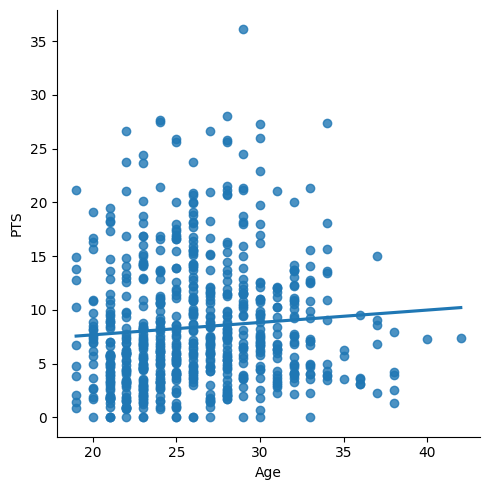

In [ ]:
sns.lmplot(x="Age", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Number of Games

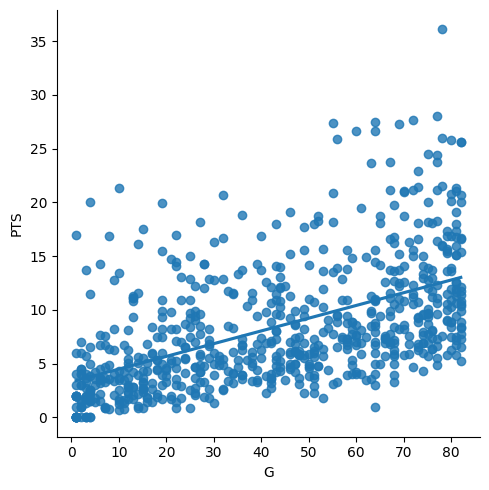

In [ ]:
sns.lmplot(x="G", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Minutes per Game

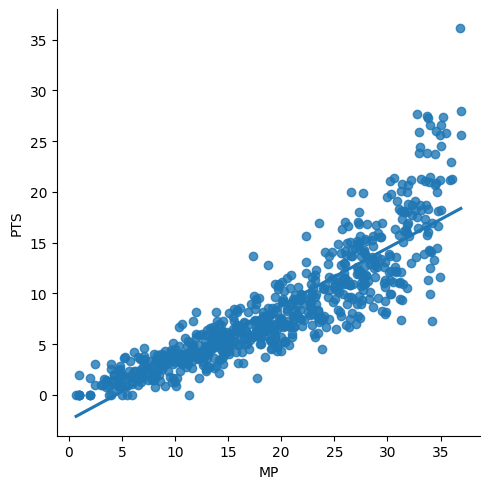

In [ ]:
sns.lmplot(x="MP", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Field Goals

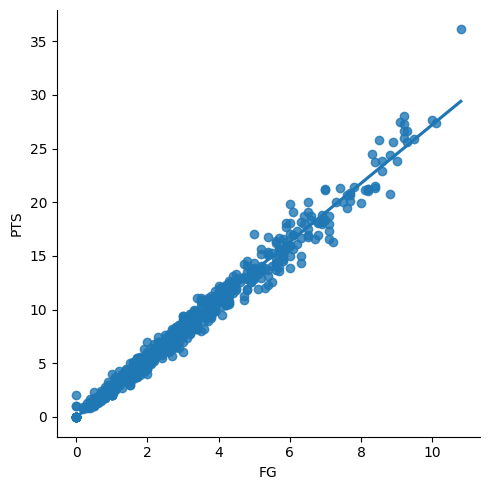

In [ ]:
sns.lmplot(x="FG", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Field Goals Attempted

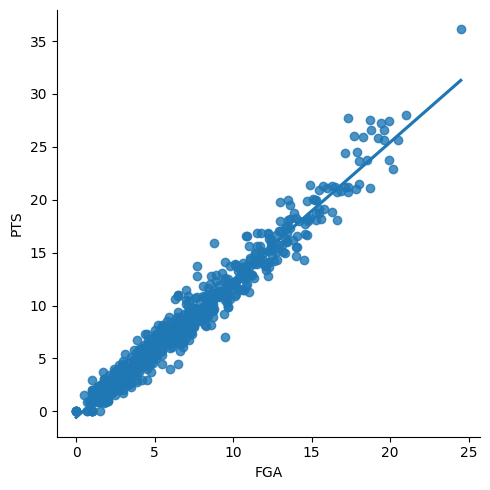

In [ ]:
sns.lmplot(x="FGA", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Field Goal Percentage

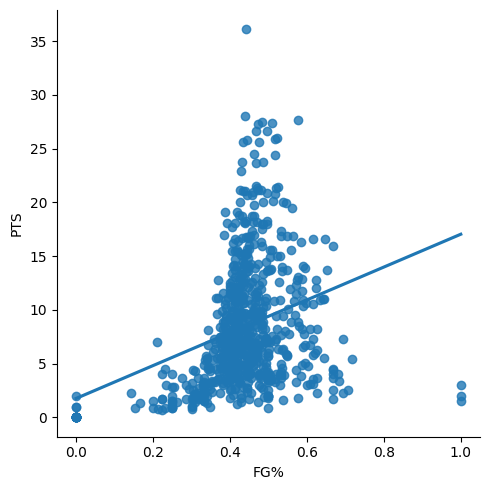

In [ ]:
sns.lmplot(x="FG%", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Three Point Field Goal

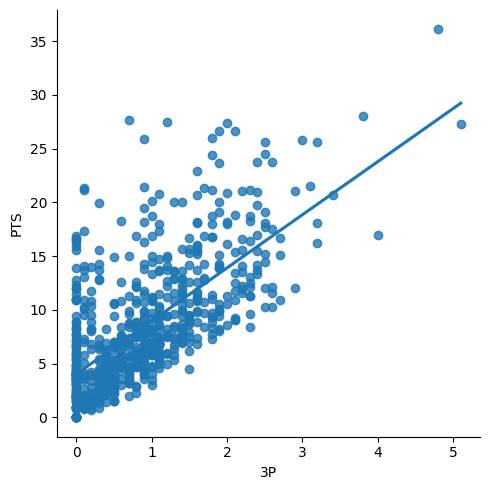

In [ ]:
sns.lmplot(x="3P", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Three Point Field Goals Attempted

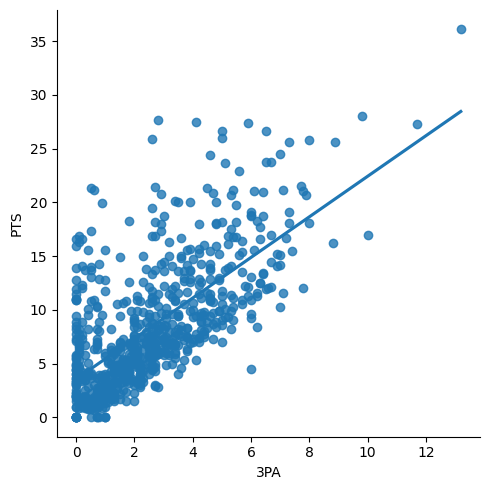

In [ ]:
sns.lmplot(x="3PA", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Three Point Field Goal Percentage

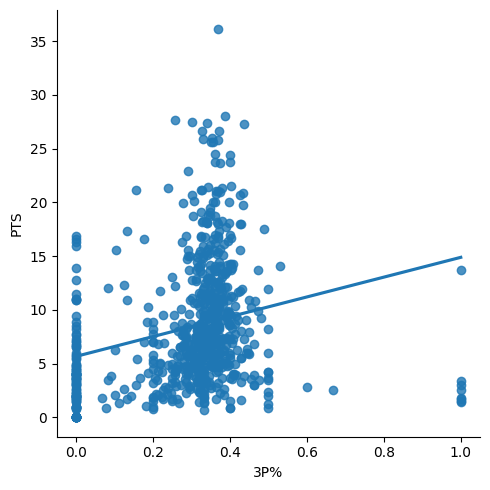

In [ ]:
sns.lmplot(x="3P%", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Two Point Field Goal

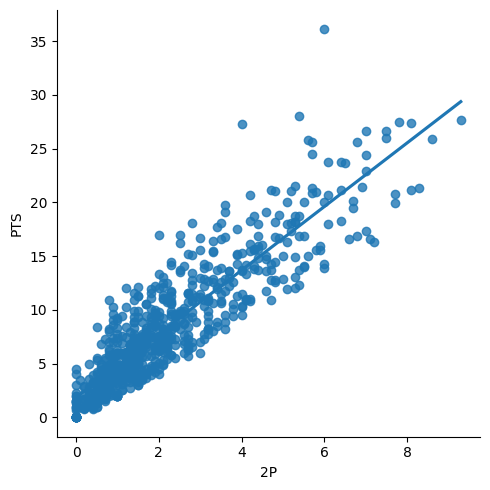

In [ ]:
sns.lmplot(x="2P", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Two Point Field Goals Attempted

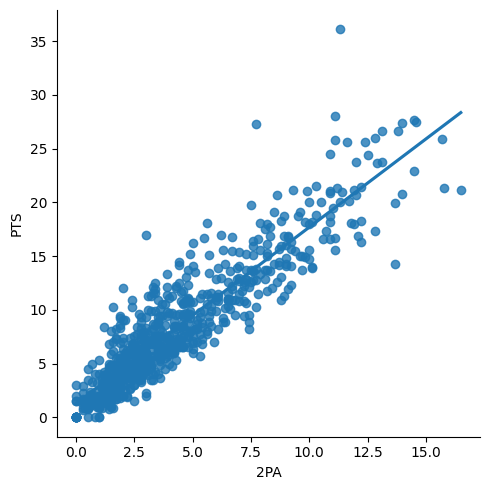

In [ ]:
sns.lmplot(x="2PA", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Two Point Field Goal Percentage

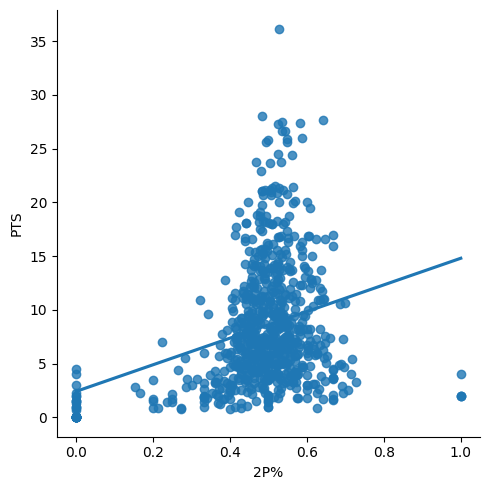

In [ ]:
sns.lmplot(x="2P%", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Effective Field Goal Percentage

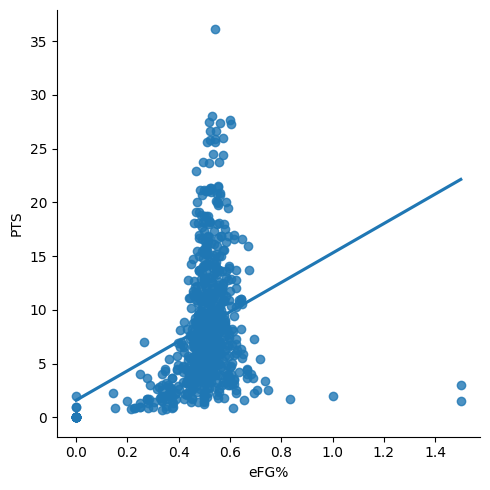

In [ ]:
sns.lmplot(x="eFG%", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Free Throws

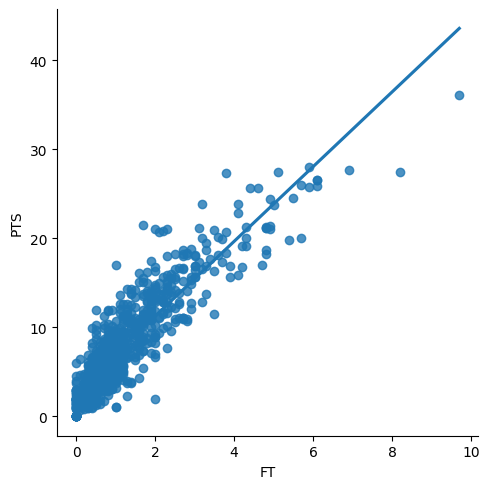

In [ ]:
sns.lmplot(x="FT", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Free Throws Attempted

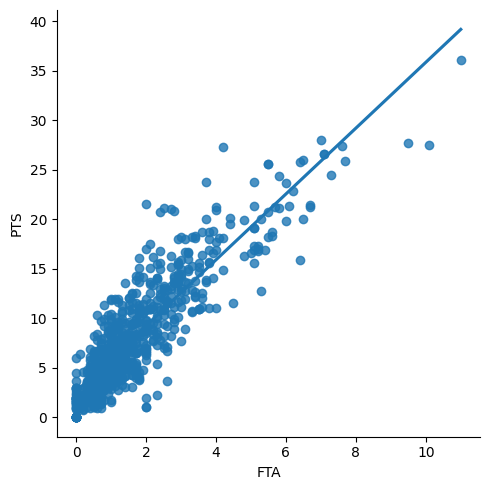

In [ ]:
sns.lmplot(x="FTA", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Free Thorw Percentage

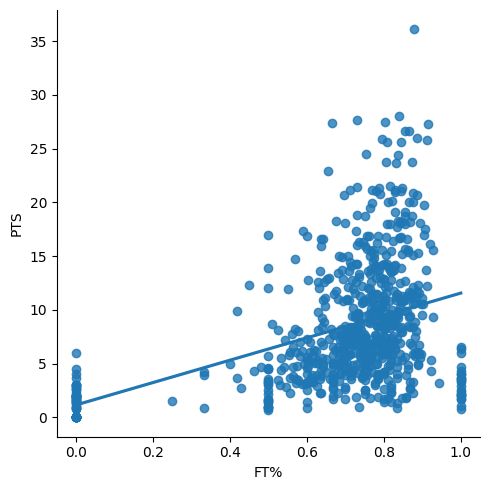

In [ ]:
sns.lmplot(x="FT%", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Offensive Rebounds

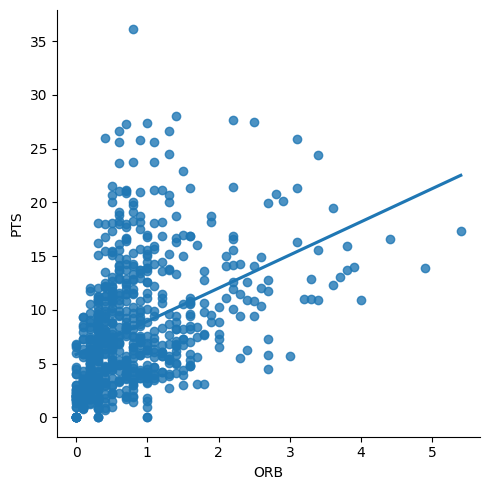

In [ ]:
sns.lmplot(x="ORB", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Defensive Rebounds

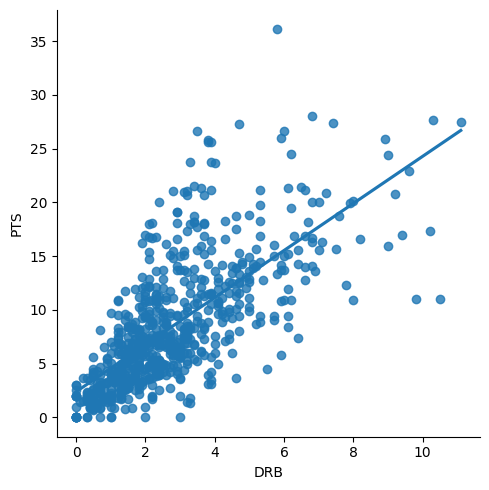

In [ ]:
sns.lmplot(x="DRB", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Total Rebounds

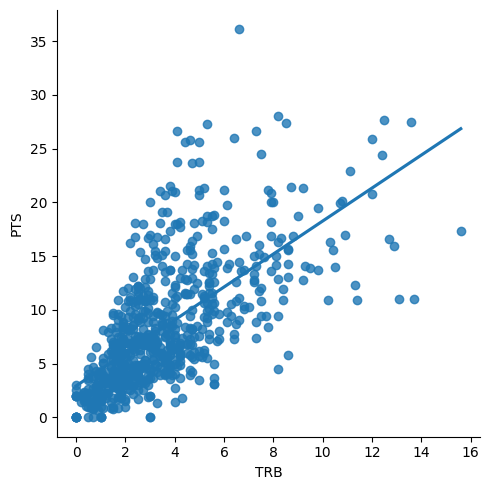

In [ ]:
sns.lmplot(x="TRB", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Assists

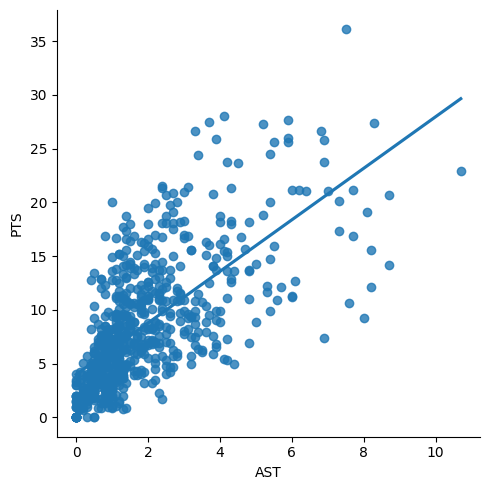

In [ ]:
sns.lmplot(x="AST", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Steals

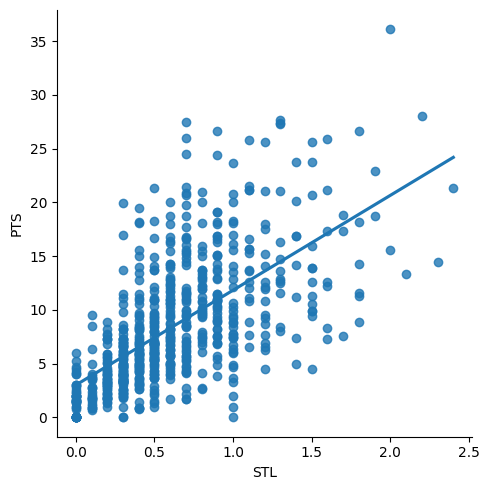

In [ ]:
sns.lmplot(x="STL", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Blocks

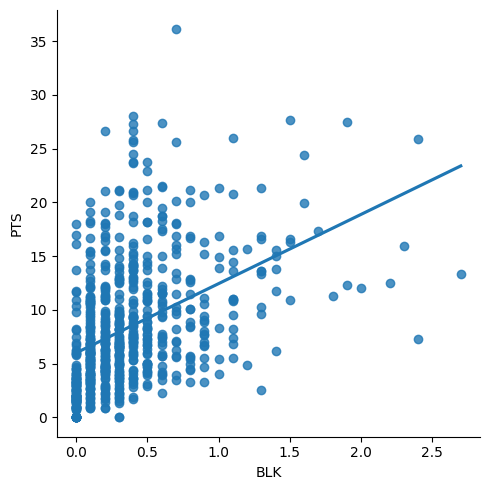

In [ ]:
sns.lmplot(x="BLK", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Turnovers

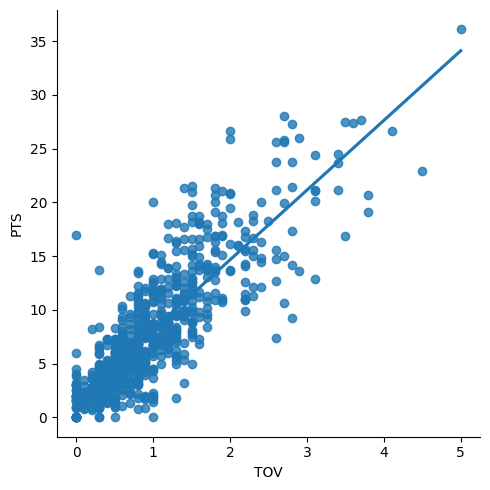

In [ ]:
sns.lmplot(x="TOV", y="PTS", data=numeric_data, fit_reg=True, ci=None)

Personal Fouls

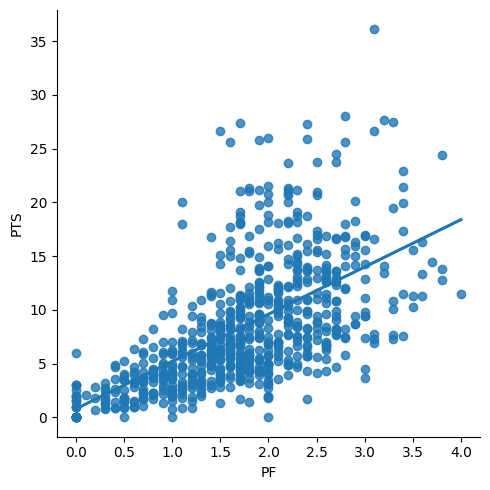

In [ ]:
sns.lmplot(x="PF", y="PTS", data=numeric_data, fit_reg=True, ci=None)

## **Histogram of Points Column**

<Axes: ylabel='Frequency'>

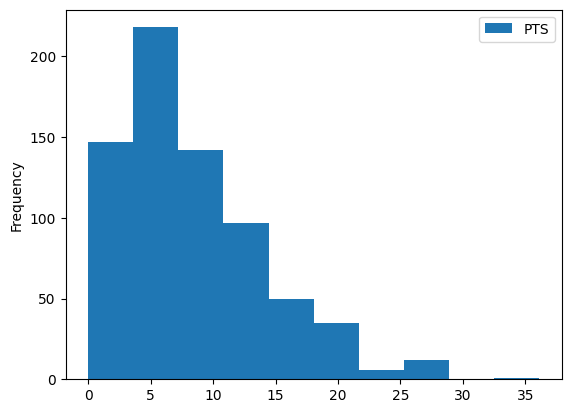

In [ ]:
numeric_data.plot.hist(y="PTS")

# **Data Preparation**

### **Data Cleaning**

In [ ]:
data[data.isnull().any(axis=1)]

,Player,Pos,Age,Tm,G,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


### **Data Separation as X and Y**

In [ ]:
y = numeric_data["PTS"]
y

,PTS
0,5.3
1,1.7
2,3.2
3,13.9
4,8.9
...,...
703,11.5
704,7.8
705,8.9
706,8.5


In [ ]:
x = numeric_data.drop('PTS', axis=1)
x

,Age,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
0,25,31,19.0,1.8,5.1,0.357,1.3,4.1,0.323,0.5,...,0.4,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7
1,28,10,12.3,0.4,1.8,0.222,0.2,1.5,0.133,0.2,...,1.0,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4
2,22,34,12.6,1.1,3.2,0.345,0.7,2.2,0.338,0.4,...,0.3,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3
3,25,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,...,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6
4,21,82,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,...,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,29,4,20.5,4.0,7.0,0.571,0.0,0.0,0.000,4.0,...,4.5,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0
704,22,59,18.3,3.1,5.6,0.553,0.0,0.0,0.000,3.1,...,2.2,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9
705,21,59,17.6,3.6,6.4,0.559,0.0,0.0,0.000,3.6,...,2.1,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3
706,21,33,15.6,3.4,5.8,0.580,0.0,0.0,0.000,3.4,...,2.0,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# **Model Building**

## **Linear Regression**

### **Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### **Applying the model to make a prediction**

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

### **Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  0.004780180986159808
LR R2 (Train):  0.9998521754013927
LR MSE (Test):  0.005897429025382147
LR R2 (Test):  0.9998525408746265


In [ ]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.00478,0.999852,0.005897,0.999853


# **Data visualization of prediction results**

Text(0.5, 0, 'Experimental Points')

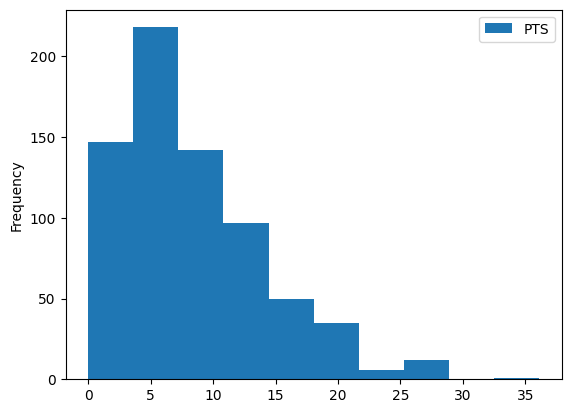

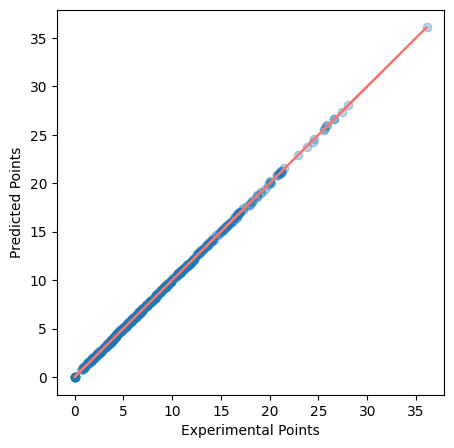

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

numeric_data.plot.hist(y="PTS")

plt.figure(figsize=(5, 5))
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predicted Points')
plt.xlabel('Experimental Points')